In [4]:
import numpy as np
from skimage.color import rgb2lab, lab2rgb, rgb2gray
import matplotlib.pyplot as plt

In [5]:
def pepper_noise(img, threshold=0.1):
    h, w, ch = img.shape
    img_lab = rgb2lab(img)
    img_l = img_lab[..., 0].reshape(h, w) / 100
    mask = np.random.rand(h, w)
    threshold = 0.1
    val = np.exp(img_l) / np.exp(img_l).max() + threshold
    out = img.copy()
    out[mask > val, :] = 0
    return out

In [6]:
def gaussian_noise(img, amount=0.2, calibration=0.05):
    h, w, ch = img.shape
    noise = np.random.normal(0, amount, (h, w, ch)) - calibration
    out = img.copy() / 255
    out = out + noise
    out = np.clip(out, 0, 1)
    return out

# Examples

In [7]:
img = np.array(Image.open('sponza_16spp_oidn.png'))

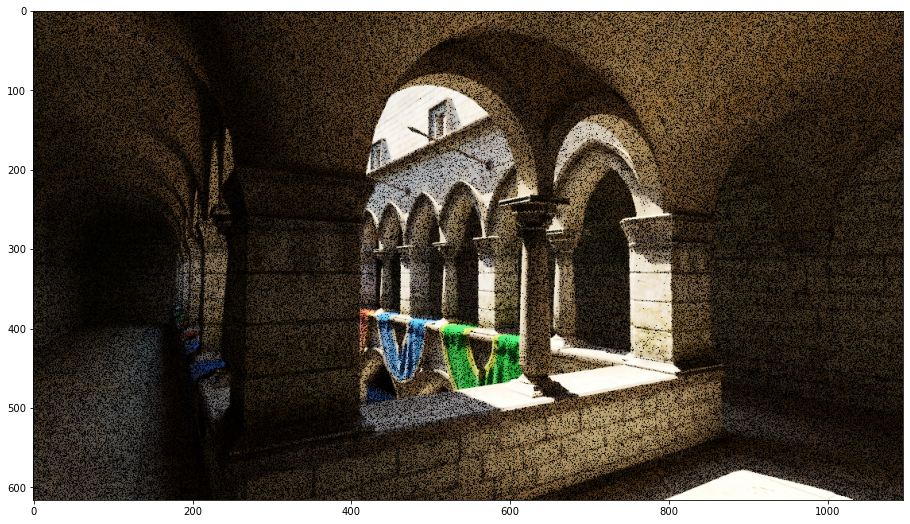

In [8]:
fig = plt.figure(figsize=(16, 9))
plt.imshow(pepper_noise(img))

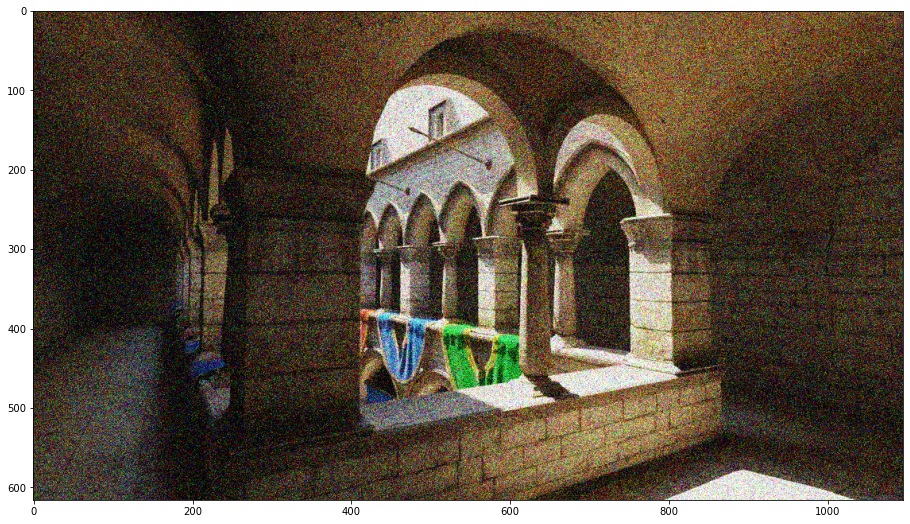

In [9]:
fig = plt.figure(figsize=(16, 9))
plt.imshow(gaussian_noise(img))